In [1]:
%matplotlib inline
import numpy  as np
import matplotlib
import matplotlib.pyplot as plt

<h2>Functions:</h2>

* **Differential Equation**


* **Differential Equation Solution**
    
    $ \frac{-3e^{2x}}{e^{3x} - 6e^{2} - e^{3}} $
    
    and this function is discontinious at the region where x=~1.38
    
    So it should be considered in our numerical methods, because otherwise they will not work correct.
    
    I take the region (dis1, dis2), where methods do not work because of overflow in python.
    
    Because point (1, 0.5) on the left side, therefore after discontinuity there is not any value of y to continue to calculate by numerical methods.
    
    Actually numerical methods cannot use the exact soultion but in this case let's consider it is possible, because otherwise we cannot calculate the right side of the plot. 
    
    yd is y(x) calculated using the exact solution, where x is the first point which consider in the plot after the discontinuity.
    
    x0 $= x_0$
    
    y0 $= y(x_0)$
    
    X is the right bound of the interval $ [x_0; X] $
    
    (dis1, dis2) is bounds of discontinuity region
    
    So the functions gets (x0, y0, dis1, dis2, yd, X)
    

* **Euler's method**

    $ y_{n+1} = y_{n} + h * f(x_{n}, y_{n}) $
    
    
* **Improved Euler's method**
    
    $ k_{1n} = f(x_{n}, y_{n}) $
    
    $ k_{2n} = f(x_{n} + h, y_{n} + hk_{1n}) $
    
    $ y_{n+1} = y_{n} + \frac{h}{2} * (k_{1n}+k_{2n}) $
    
    
* **Runge-Kutta method**

    $ k_{1n} = f(x_{n}, y_{n}) $
    
    $ k_{2n} = f(x_{n} + \frac{h}{2}, y_{n} + \frac{h}{2} * k_{1n}) $
    
    $ k_{3n} = f(x_{n} + \frac{h}{2}, y_{n} + \frac{h}{2} * k_{2n}) $
    
    $ k_{4n} = f(x_{n} + h, y_{n} + hk_{3n}) $
    
    $ y_{n+1} = y_{n} + \frac{h}{6} * (k_{1n}+2k_{2n}+2k_{3n}+k_{4n}) $
    

In [2]:
def f(x, y):
    return y*y*np.exp(x) + 2 * y

In [3]:
def exact(x):
    #a = (np.exp(3*x) - (np.exp(2)*6) - np.exp(3))
    a = (np.exp(3*x) - 64.4199)
    res = (-3*np.exp(2*x))/a
    return res

exact(np.array([1])) # y(1) = 0.5

array([0.4999997])

In [4]:
GRID_SIZE = 100
X = 7
x0 = 1
y0 = 0.5

h = (X - x0)/GRID_SIZE
x = np.arange(x0, X, h) #Let's have the separate list of x for easier calculation of errors

In [5]:
def euler(y0, dis1, dis2, yd, X):
    ys = []
    y = y0
    for t in x :
        if t > dis1 and t < dis2: # Set Not a Number for discountinuity region
            ys.append(np.nan)
            y = yd
        else:
            y_n  = y + h*f(t,y)
            ys.append(y)
            y = y_n
    return ys 
    

In [6]:
def impr_euler(y0,dis1, dis2, yd, X):
    ys = []
    y = y0
    for t in x :
        if t > dis1 and t<dis2: # Set Not a Number for discountinuity region
            ys.append(np.nan)
            y = yd
        else:
            k1 = f(t,y)
            k2 = f(t+h,y + h*k1)
            y_n  = y + (h/2)*(k1+k2)
            ys.append(y)
            y = y_n
    return ys 

In [7]:
def runge_kutta(y0,dis1, dis2, yd, X):
    ys =[]
    y = y0
    for t in x :
        if t > dis1 and t<dis2: # Set Not a Number for discountinuity region
            ys.append(np.nan)
            y = yd
        else:
            k1 = f(t,y)
            k2 = f(t+h/2,y + h*k1/2)
            k3 = f(t+h/2,y + h*k2/2)
            k4 = f(t+h,y + h*k3)
            y_n  = y + (h/6)*(k1+2*k2 + 2*k3 + k4)
            ys.append(y)
            y = y_n
    return ys 

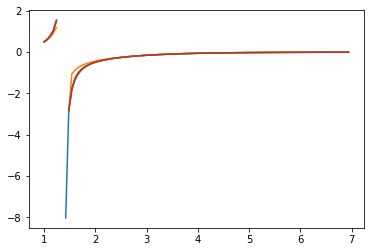

Value on y( 1.0 )= 0.49999970132391003
     Euler's:  0.5  err =  2.9867608997147244e-07
     Improved Euler's:  0.5  err =  2.9867608997147244e-07
     Runge-Kutta:  0.5  err =  2.9867608997147244e-07
Value on y( 1.06 )= 0.619060307704631
     Euler's:  0.6007742274268857  err =  0.018286080277745365
     Improved Euler's:  0.6176868754213332  err =  0.001373432283297893
     Runge-Kutta:  0.6190573823770068  err =  2.9253276242480197e-06
Value on y( 1.12 )= 0.7908906265890617
     Euler's:  0.7353737508426662  err =  0.05551687574639552
     Improved Euler's:  0.7860714833292082  err =  0.004819143259853553
     Runge-Kutta:  0.7908765766511068  err =  1.4049937954951908e-05
Value on y( 1.1800000000000002 )= 1.0607576774997722
     Euler's:  0.923062310730324  err =  0.13769536676944827
     Improved Euler's:  1.0461600272857723  err =  0.014597650213999946
     Runge-Kutta:  1.0606961562947534  err =  6.152120501878855e-05
Value on y( 1.2400000000000002 )= 1.5470961170781026
     Eu

Value on y( 4.540000000000003 )= -0.03202272800706959
     Euler's:  -0.03170663492748874  err =  0.0003160930795808453
     Improved Euler's:  -0.032063979826254724  err =  4.1251819185135485e-05
     Runge-Kutta:  -0.032022822508324965  err =  9.450125537657783e-08
Value on y( 4.600000000000003 )= -0.03015748034368182
     Euler's:  -0.029860129296540774  err =  0.0002973510471410458
     Improved Euler's:  -0.030196240258307302  err =  3.875991462548231e-05
     Runge-Kutta:  -0.03015756913988631  err =  8.879620449001036e-08
Value on y( 4.660000000000004 )= -0.028400939291528576
     Euler's:  -0.028121168778267456  err =  0.00027977051326111974
     Improved Euler's:  -0.02843737052483517  err =  3.643123330659276e-05
     Runge-Kutta:  -0.028401022755493506  err =  8.346396493039143e-08
Value on y( 4.720000000000003 )= -0.026746756548730172
     Euler's:  -0.026483487359625454  err =  0.000263269189104718
     Improved Euler's:  -0.026781009168045336  err =  3.425261931516363e-05

     Euler's:  -0.004935807331225295  err =  4.8865961296305944e-05
     Improved Euler's:  -0.004990999073879418  err =  6.325781357816723e-06
     Runge-Kutta:  -0.0049846877865712905  err =  1.4494049689617317e-08
Value on y( 6.460000000000004 )= -0.0046943882898851175
     Euler's:  -0.004648368276341305  err =  4.602001354381269e-05
     Improved Euler's:  -0.004700345609420965  err =  5.957319535847445e-06
     Runge-Kutta:  -0.0046944019396913655  err =  1.3649806247968688e-08
Value on y( 6.520000000000005 )= -0.004421008218529698
     Euler's:  -0.0043776683719142055  err =  4.3339846615492866e-05
     Improved Euler's:  -0.004426618549571984  err =  5.610331042285241e-06
     Runge-Kutta:  -0.004421021073293459  err =  1.285476376039485e-08
Value on y( 6.580000000000005 )= -0.004163548601493659
     Euler's:  -0.004122732804993319  err =  4.081579650034011e-05
     Improved Euler's:  -0.004168832163630447  err =  5.283562136787663e-06
     Runge-Kutta:  -0.0041635607075432455 

In [8]:
y = exact(x);
#Using exact solution find the discontinuity. Let's consider it is the difference between Xn+1 - Xn >= 5 
pos = np.where(np.diff(y)>=5)[0]

#Find bounds of discontinious region
if len(pos) > 0: 
    dis1 = x[pos[0] - 1]
    dis2 = x[pos[-1] + 1]
    yd = y[pos[-1] + 1]
else:
    dis1 = -1
    dis2 = -1
    yd = -1
    
#Calculate using the numerical methods
eul = euler(y0,dis1,dis2, yd,X)
i_eul = impr_euler(y0,dis1,dis2, yd,X)
run_k = runge_kutta(y0,dis1,dis2, yd,X)

# Set Not a Number for discountinuity region 
if(len(pos)>0):
    for i in range(pos[0],pos[-1],1):
        y[i] = np.nan

#Plot the graphs together
plt.plot(x,y)
plt.plot(x,eul)
plt.plot(x, i_eul)
plt.plot(x, run_k)

#Make the dictionary [x: y] for calculation of error
ex_v = dict((x, y) for x, y in zip(x,y))
eul_v = dict((x, y) for x, y in zip(x,eul))
i_eul_v = dict((x, y) for x, y in zip(x, i_eul))
run_k_v = dict((x, y) for x, y in zip(x, run_k))

plt.show()

#Calculate error
for t in x:
     if(not np.isnan(t)):
        print("Value on y(", t, ")=", ex_v[t])
        print("     Euler's: ", eul_v[t], " err = ", np.abs(ex_v[t]-eul_v[t]))
        print("     Improved Euler's: ", i_eul_v[t], " err = ", np.abs(ex_v[t]-i_eul_v[t]))
        print("     Runge-Kutta: ", run_k_v[t], " err = ", np.abs(ex_v[t]-run_k_v[t]))


## Plots

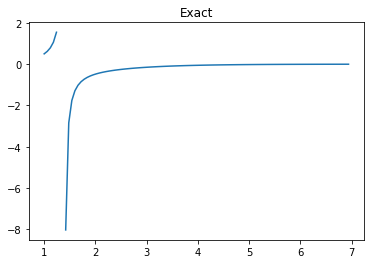

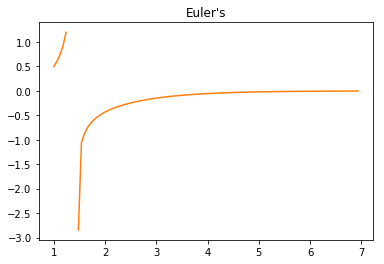

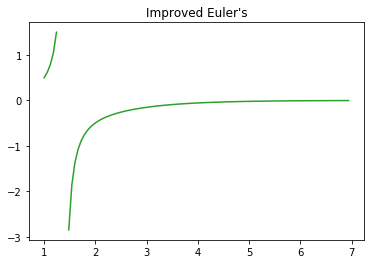

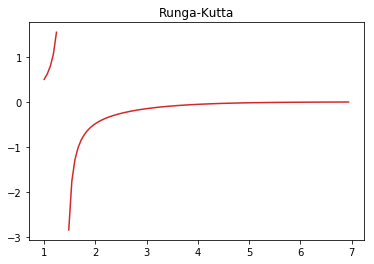

In [9]:
plt.title("Exact")
plt.plot(x,y)
plt.show()

plt.title("Euler's")
plt.plot(x,eul, "C1")
plt.show()

plt.title("Improved Euler's")
plt.plot(x,i_eul, "C2")
plt.show()

plt.title("Runga-Kutta")
plt.plot(x,run_k, "C3")
plt.show()

## Only Left Side
Actually we know that there is not true numerical method used for the right side, let's check only left side now.
Error increase every step.

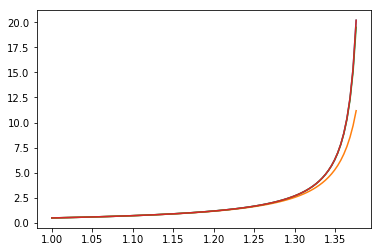

Value on y( 1.0 )= 0.49999970132391003
     Euler's:  0.5  err =  2.9867608997147244e-07
     Improved Euler's:  0.5  err =  2.9867608997147244e-07
     Runge-Kutta:  0.5  err =  2.9867608997147244e-07
Value on y( 1.0038 )= 0.5064447935570212
     Euler's:  0.506382367737036  err =  6.242581998516794e-05
     Improved Euler's:  0.5064448364914812  err =  4.293445998726497e-08
     Runge-Kutta:  0.5064450976607104  err =  3.04103689230395e-07
Value on y( 1.0076 )= 0.5130178226714215
     Euler's:  0.5128896729829624  err =  0.00012814968845908936
     Improved Euler's:  0.51301759499129  err =  2.2768013152596467e-07
     Runge-Kutta:  0.5130181323554254  err =  3.0968400388520223e-07
Value on y( 1.0114 )= 0.5197226166952648
     Euler's:  0.5195255915145521  err =  0.00019702518071262887
     Improved Euler's:  0.5197221026326495  err =  5.140626152533301e-07
     Runge-Kutta:  0.519722932118291  err =  3.1542302625364727e-07
Value on y( 1.0152 )= 0.526563159433344
     Euler's:  0.526

     Euler's:  1.1302981871391657  err =  0.01589366778385992
     Improved Euler's:  1.1460953898118686  err =  9.646511115701806e-05
     Runge-Kutta:  1.146192918616101  err =  1.0636930753982199e-06
Value on y( 1.1976000000000013 )= 1.171874032746541
     Euler's:  1.154907269299171  err =  0.016966763447369804
     Improved Euler's:  1.1717696698262274  err =  0.00010436292031346106
     Runge-Kutta:  1.1718751361080444  err =  1.103361503496103e-06
Value on y( 1.2014000000000014 )= 1.1985939492957325
     Euler's:  1.180472175574408  err =  0.018121773721324397
     Improved Euler's:  1.198480945984732  err =  0.00011300331100039251
     Runge-Kutta:  1.198595094677865  err =  1.1453821324725055e-06
Value on y( 1.2052000000000014 )= 1.2264160680256844
     Euler's:  1.2070495938271144  err =  0.01936647419856996
     Improved Euler's:  1.226293596994514  err =  0.00012247103117046798
     Runge-Kutta:  1.226417257973008  err =  1.1899473235654767e-06
Value on y( 1.209000000000001

     Improved Euler's:  15.067622491099309  err =  0.32566850495966904
     Runge-Kutta:  15.39283615151263  err =  0.000454844546347033
Value on y( 1.3762000000000025 )= 20.198093481299477
     Euler's:  11.182995677933592  err =  9.015097803365885
     Improved Euler's:  19.49595932262314  err =  0.702134158676337
     Runge-Kutta:  20.19610947667987  err =  0.0019840046196080152


In [10]:
X = 1.38
h = (X - x0)/GRID_SIZE
x = np.arange(x0, X, h)
y = exact(x);
    
dis1 = -1
dis2 = -1
yd = -1
    
#Calculate using the numerical methods
eul = euler(y0,dis1,dis2, yd,X)
i_eul = impr_euler(y0,dis1,dis2, yd,X)
run_k = runge_kutta(y0,dis1,dis2, yd,X)

#Plot the graphs together
plt.plot(x,y)
plt.plot(x,eul)
plt.plot(x, i_eul)
plt.plot(x, run_k)

#Make the dictionary [x: y] for calculation of error
ex_v = dict((x, y) for x, y in zip(x,y))
eul_v = dict((x, y) for x, y in zip(x,eul))
i_eul_v = dict((x, y) for x, y in zip(x, i_eul))
run_k_v = dict((x, y) for x, y in zip(x, run_k))

plt.show()

#Calculate error
for t in x:
     if(not np.isnan(t)):
        print("Value on y(", t, ")=", ex_v[t])
        print("     Euler's: ", eul_v[t], " err = ", np.abs(ex_v[t]-eul_v[t]))
        print("     Improved Euler's: ", i_eul_v[t], " err = ", np.abs(ex_v[t]-i_eul_v[t]))
        print("     Runge-Kutta: ", run_k_v[t], " err = ", np.abs(ex_v[t]-run_k_v[t]))



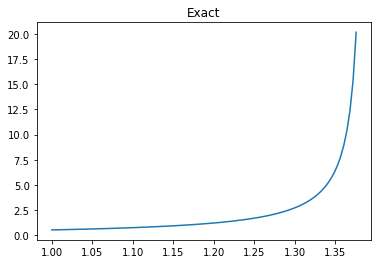

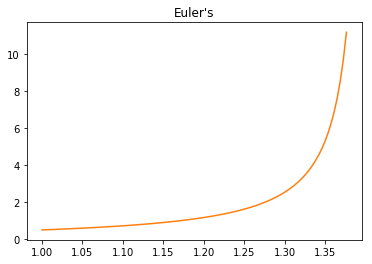

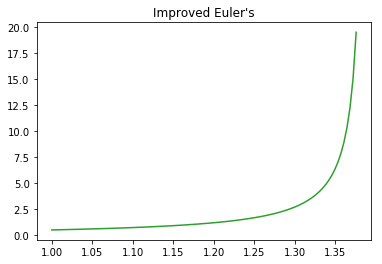

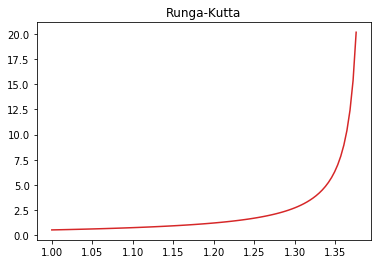

In [11]:
plt.title("Exact")
plt.plot(x,y)
plt.show()

plt.title("Euler's")
plt.plot(x,eul, "C1")
plt.show()

plt.title("Improved Euler's")
plt.plot(x,i_eul, "C2")
plt.show()

plt.title("Runga-Kutta")
plt.plot(x,run_k, "C3")
plt.show()

## Error
Error decrease when grid size increase, because we have smaller steps

In [12]:
for j in range(100,1000,10):
    X = 1.38
    h = (X - x0)/j
    x = np.arange(x0, X, h)
    y = exact(x);
    
    dis1 = -1
    dis2 = -1
    yd = -1
    
    #Calculate using the numerical methods
    eul = euler(y0,dis1,dis2, yd,X)
    i_eul = impr_euler(y0,dis1,dis2, yd,X)
    run_k = runge_kutta(y0,dis1,dis2, yd,X)

    ex_v = dict((x, y) for x, y in zip(x,y))
    eul_v = dict((x, y) for x, y in zip(x,eul))
    i_eul_v = dict((x, y) for x, y in zip(x, i_eul))
    run_k_v = dict((x, y) for x, y in zip(x, run_k))

    eul_t_err = 0
    i_eul_t_err = 0
    run_k_t_err = 0
    n = 0
    #Calculate error
    for t in x:
         
        temp = np.abs(ex_v[t]-eul_v[t])
        eul_t_err = eul_t_err + temp
                
        temp = np.abs(ex_v[t]-i_eul_v[t])
        i_eul_t_err = i_eul_t_err+temp
                
        temp = np.abs(ex_v[t]-run_k_v[t])
        run_k_t_err = run_k_t_err+temp
        n = n + 1
                
    print("Grid Size:", j, "Step:", h)
    print("  Total Errors:")
    print("    Euler's:", eul_t_err/n, " Impr. Euler's:", i_eul_t_err/n, "Runge-Kutta: ", run_k_t_err/n)


Grid Size: 100 Step: 0.003799999999999999
  Total Errors:
    Euler's: 0.3393808941368161  Impr. Euler's: 0.015657491440545353 Runge-Kutta:  2.8365799359606482e-05
Grid Size: 110 Step: 0.0034545454545454536
  Total Errors:
    Euler's: 0.32475085457145525  Impr. Euler's: 0.013664295366650602 Runge-Kutta:  2.0894830399409425e-05
Grid Size: 120 Step: 0.0031666666666666657
  Total Errors:
    Euler's: 0.311308781982261  Impr. Euler's: 0.012022698883355564 Runge-Kutta:  1.5802642045500043e-05
Grid Size: 130 Step: 0.0029230769230769223
  Total Errors:
    Euler's: 0.2989280011100621  Impr. Euler's: 0.010655752612054379 Runge-Kutta:  1.2363795877902748e-05
Grid Size: 140 Step: 0.0027142857142857134
  Total Errors:
    Euler's: 0.2874947253982138  Impr. Euler's: 0.009506193571907486 Runge-Kutta:  9.936533888508872e-06
Grid Size: 150 Step: 0.0025333333333333328
  Total Errors:
    Euler's: 0.27690832214702943  Impr. Euler's: 0.00853077318089117 Runge-Kutta:  8.397203486404751e-06
Grid Size: 16

Grid Size: 640 Step: 0.0005937499999999999
  Total Errors:
    Euler's: 0.09974754536383448  Impr. Euler's: 0.0006409361662034353 Runge-Kutta:  1.0304652389326284e-05
Grid Size: 650 Step: 0.0005846153846153845
  Total Errors:
    Euler's: 0.09847210460848276  Impr. Euler's: 0.0006220305322776624 Runge-Kutta:  1.031275815897903e-05
Grid Size: 660 Step: 0.0005757575757575756
  Total Errors:
    Euler's: 0.09722903799042511  Impr. Euler's: 0.0006039356484844236 Runge-Kutta:  1.0320514839646866e-05
Grid Size: 670 Step: 0.0005671641791044774
  Total Errors:
    Euler's: 0.0960171225817357  Impr. Euler's: 0.0005866058696925505 Runge-Kutta:  1.0327950842109717e-05
Grid Size: 680 Step: 0.0005588235294117646
  Total Errors:
    Euler's: 0.09483519654739805  Impr. Euler's: 0.0005699987305104752 Runge-Kutta:  1.0335078214881998e-05
Grid Size: 690 Step: 0.0005507246376811592
  Total Errors:
    Euler's: 0.09368215533805897  Impr. Euler's: 0.0005540746525218252 Runge-Kutta:  1.0341920105354088e-05
